Missing values in each column
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
City                0
Purchase Address    0
dtype: int64


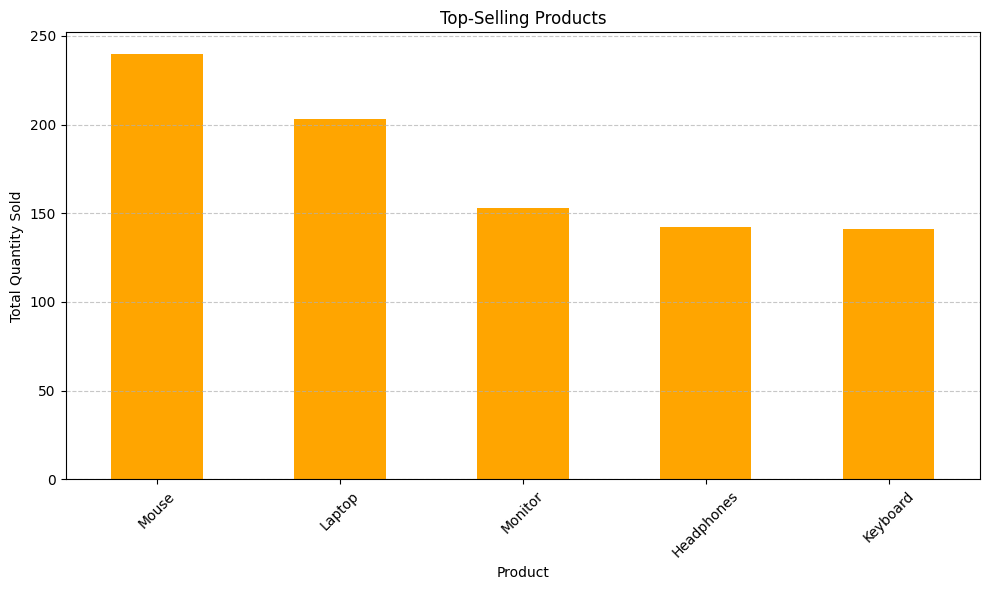

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/sales_data.csv")

df.head()

print("Missing values in each column")
print(df.isnull().sum())

df = df.dropna()
df['Order Date']=pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.month
df['Sales'] = df['Quantity Ordered']*df['Price Each']

df.head()

# Group by Product and sum Quantity Ordered
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Plot top-selling products
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='orange')
plt.title('Top-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



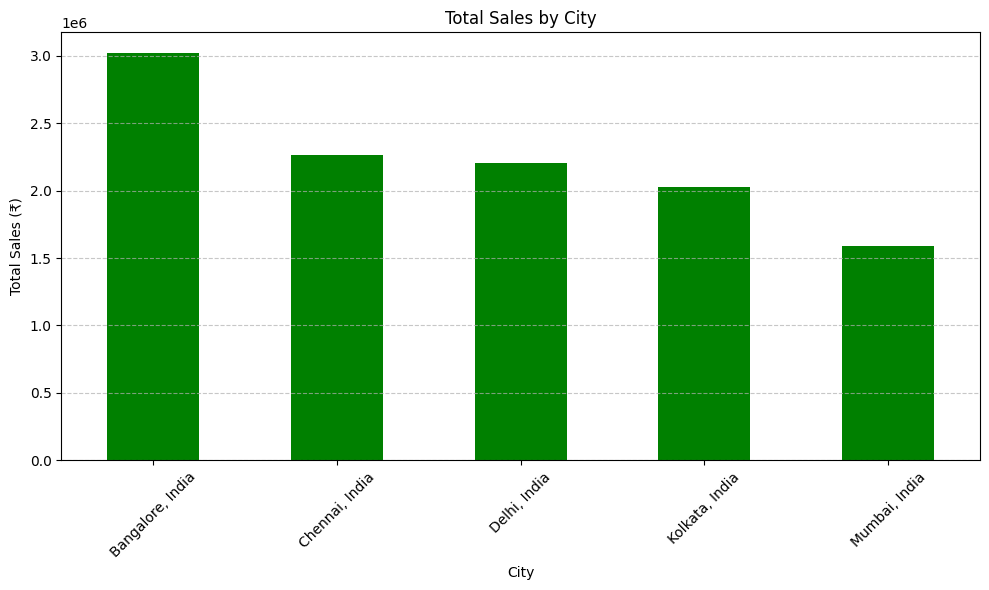

In [9]:
# Group by City and sum Sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot city-wise sales
plt.figure(figsize=(10,6))
city_sales.plot(kind='bar', color='green')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


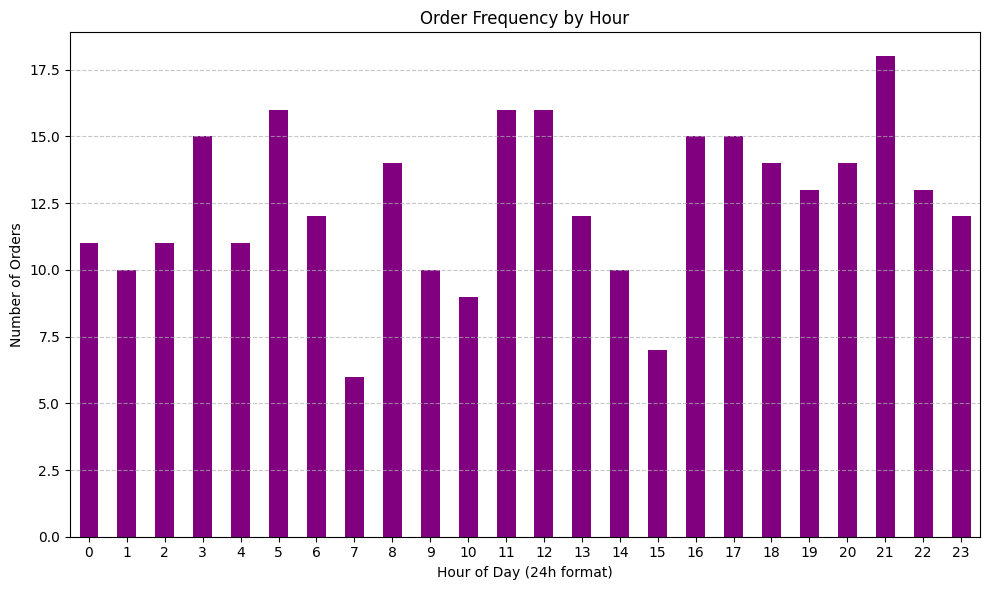

In [10]:
# Extract hour from 'Order Date'
df['Hour'] = df['Order Date'].dt.hour

# Group by Hour and count number of orders
hourly_orders = df.groupby('Hour').size()

# Plot hourly order frequency
plt.figure(figsize=(10,6))
hourly_orders.plot(kind='bar', color='purple')
plt.title('Order Frequency by Hour')
plt.xlabel('Hour of Day (24h format)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


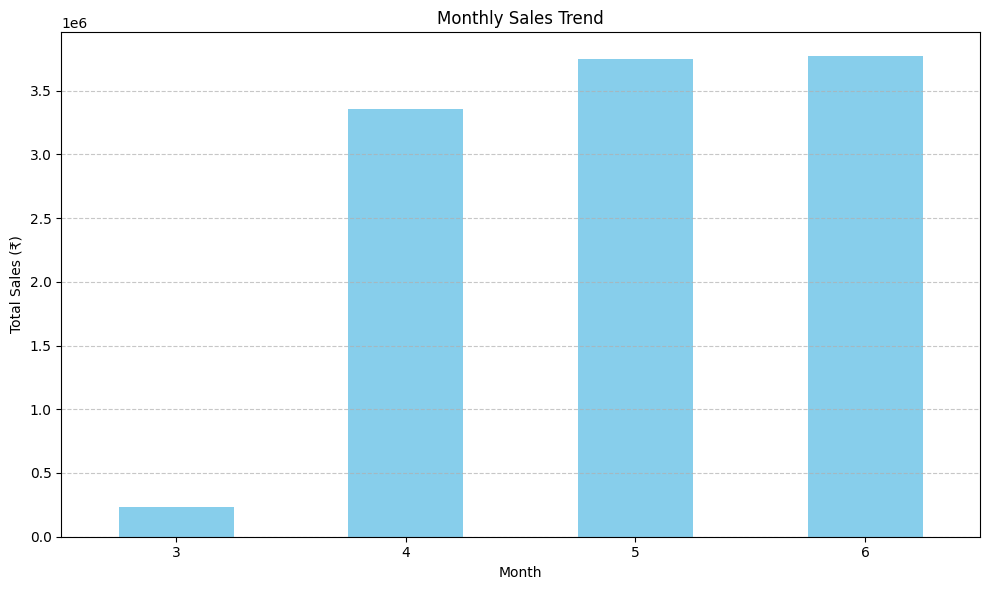

In [11]:
# Group total sales by month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plotting monthly sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
